## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df_kc = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [3]:
df_kc.drop(['date', 'view', 'waterfront','yr_renovated','condition','zipcode','sqft_basement'],axis=1, inplace=True)

In [4]:
df_kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,7 Average,1180,1955,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,7 Average,2170,1951,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,6 Low Average,770,1933,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,7 Average,1050,1965,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,8 Good,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,8 Good,1530,2009,47.6993,-122.346,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,8 Good,2310,2014,47.5107,-122.362,1830,7200
1523300141,402101.0,2,0.75,1020,1350,2.0,7 Average,1020,2009,47.5944,-122.299,1020,2007


In [5]:
df_kc=df_kc[df_kc['bedrooms']<=5]

In [6]:
df_kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,7 Average,1180,1955,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,7 Average,2170,1951,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,6 Low Average,770,1933,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,7 Average,1050,1965,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,8 Good,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,8 Good,1530,2009,47.6993,-122.346,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,8 Good,2310,2014,47.5107,-122.362,1830,7200
1523300141,402101.0,2,0.75,1020,1350,2.0,7 Average,1020,2009,47.5944,-122.299,1020,2007


In [7]:
df_kc=df_kc[df_kc['bathrooms']<=4]

In [8]:
df_kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,7 Average,1180,1955,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,7 Average,2170,1951,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,6 Low Average,770,1933,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,7 Average,1050,1965,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,8 Good,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,8 Good,1530,2009,47.6993,-122.346,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,8 Good,2310,2014,47.5107,-122.362,1830,7200
1523300141,402101.0,2,0.75,1020,1350,2.0,7 Average,1020,2009,47.5944,-122.299,1020,2007


In [9]:
df_kc['price'].sort_values(ascending=False)[:50]
                        

id
3835500195    4490000.0
7397300170    3710000.0
4389201095    3650000.0
2425049063    3640000.0
4114601570    3600000.0
1118000320    3400000.0
3126059023    3400000.0
9808100150    3350000.0
3625059152    3300000.0
7524900003    3280000.0
624069108     3200000.0
251500080     3200000.0
8964800890    3200000.0
3025059124    3170000.0
333100295     3120000.0
4131900066    3100000.0
3760500116    3070000.0
1732800780    3070000.0
8964800330    3000000.0
9808100100    3000000.0
1925059254    3000000.0
518500480     3000000.0
1118000340    3000000.0
3625049014    2950000.0
6613000930    2950000.0
7960900060    2900000.0
6447300365    2900000.0
7159200040    2900000.0
2624049091    2900000.0
1118000301    2890000.0
2303900090    2880000.0
6065300840    2850000.0
1069000070    2800000.0
3859900060    2750000.0
7397300220    2750000.0
624069035     2750000.0
2525049086    2720000.0
2524069078    2700000.0
5442300807    2700000.0
625059036     2700000.0
8043700300    2700000.0
2525049263   

In [10]:
df_kc['grade'].value_counts()

7 Average        8846
8 Good           5948
9 Better         2556
6 Low Average    2030
10 Very Good     1043
11 Excellent      310
5 Fair            239
12 Luxury          57
4 Low              27
13 Mansion          4
3 Poor              1
Name: grade, dtype: int64

In [11]:
df_kc['grade']=df_kc.grade.str.split(expand=True)



<ipython-input-11-74617e5147a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['grade']=df_kc.grade.str.split(expand=True)


In [12]:
df_kc['grade']=df_kc['grade'].astype(int)



<ipython-input-12-f758177e1135>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['grade']=df_kc['grade'].astype(int)


In [13]:
x_columns = ['bedrooms', 'bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','yr_built', 'sqft_living15','sqft_lot15']

df_kc2 = df_kc[x_columns]
df_kc2['price'] = df_kc['price']
df_kc = df_kc2



<ipython-input-13-fd2c3cf5a11b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc2['price'] = df_kc['price']


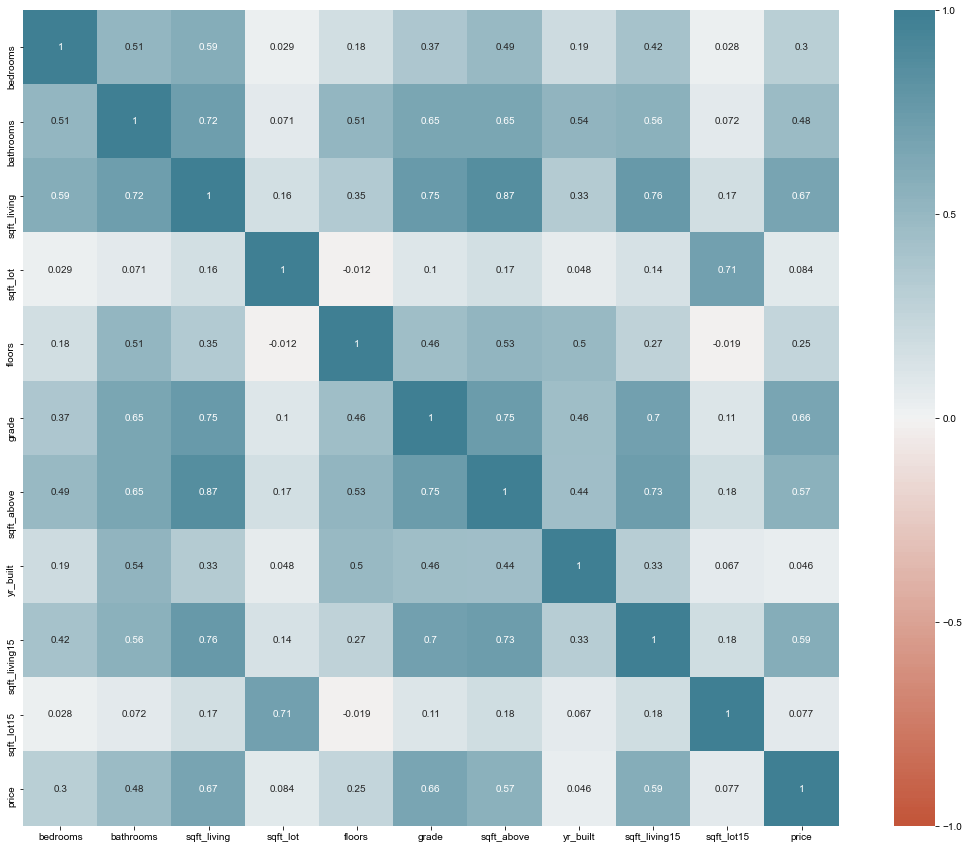

In [14]:
corr = df_kc.corr()
fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True,
xticklabels = corr.columns.values,
yticklabels = corr.columns.values,
vmin = -1,
vmax = 1,
center = 0,
cmap = sns.diverging_palette(20, 220, n = 200),
square = True)
sns.set(font_scale=5)
plt.show()



In [15]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features})

In [16]:
corr_price_df

,Correlations,Features
0,0.476202,bathrooms
1,0.671091,sqft_living
2,0.664058,grade
3,0.569847,sqft_above
4,0.591469,sqft_living15


In [17]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .70 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

In [18]:
MC_df

,Correlations,Features
3,0.866220,"[sqft_living, sqft_above]"
9,0.866220,"[sqft_above, sqft_living]"
4,0.763473,"[sqft_living, sqft_living15]"
12,0.763473,"[sqft_living15, sqft_living]"
2,0.754325,"[sqft_living, grade]"
6,0.754325,"[grade, sqft_living]"
7,0.745109,"[grade, sqft_above]"
10,0.745109,"[sqft_above, grade]"
11,0.733418,"[sqft_above, sqft_living15]"
14,0.733418,"[sqft_living15, sqft_above]"


In [19]:
dff= "price ~ sqft_living15"
dff_price_living = ols(formula= dff, data=df_kc).fit()
dff_price_living_summ = dff_price_living.summary()

dff_price_living_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                 1.133e+04
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:24:40   Log-Likelihood:            -2.9237e+05
No. Observations:               21061   AIC:                         5.847e+05
Df Residuals:                   21059   BIC:                         5.848e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.699e+04   5562.011     -6.650      0.000   -4.79e+04   -2.61e+04
sqft_living15   284.8197      2.676    106.448      0.000     279.575     290.064
==============================================================================
Omnibus:                    12919.694   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           225082.398
Skew:                           2.646   Prob(JB):                         0.00
Kurtosis:                      18.116   Cond. No.                     6.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
dff= "price_log ~ sqft_living15_log"
dff_price_living = ols(formula= dff, data=df_kc).fit()
dff_price_living_summ = dff_price_living.summary()

dff_price_living_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                 1.163e+04
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:41:25   Log-Likelihood:                -11063.
No. Observations:               21061   AIC:                         2.213e+04
Df Residuals:                   21059   BIC:                         2.215e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.9389      0.066     90.210      0.000       5.810       6.068
sqft_living15_log     0.9415      0.009    107.822      0.000       0.924       0.959
==============================================================================
Omnibus:                      190.681   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.653
Skew:                           0.206   Prob(JB):                     3.63e-45
Kurtosis:                       3.250   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
dff= "price ~ sqft_above"
dff_price_living = ols(formula= dff, data=df_kc).fit()
dff_price_living_summ = dff_price_living.summary()

dff_price_living_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                 1.013e+04
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:24:40   Log-Likelihood:            -2.9277e+05
No. Observations:               21061   AIC:                         5.855e+05
Df Residuals:                   21059   BIC:                         5.856e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.114e+05   4483.159     24.847      0.000    1.03e+05     1.2e+05
sqft_above   235.2001      2.337    100.632      0.000     230.619     239.781
==============================================================================
Omnibus:                    12228.750   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184547.179
Skew:                           2.501   Prob(JB):                         0.00
Kurtosis:                      16.612   Cond. No.                     4.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
dff= "price_log ~ sqft_above_log"
dff_price_living = ols(formula= dff, data=df_kc).fit()
dff_price_living_summ = dff_price_living.summary()

dff_price_living_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     9780.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:46:37   Log-Likelihood:                -11675.
No. Observations:               21061   AIC:                         2.335e+04
Df Residuals:                   21059   BIC:                         2.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.9452      0.052    154.257      0.000       7.844       8.046
sqft_above_log     0.6890      0.007     98.894      0.000       0.675       0.703
==============================================================================
Omnibus:                      110.745   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.892
Skew:                           0.164   Prob(JB):                     1.37e-24
Kurtosis:                       2.869   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Variables we could use
price = df_kc['price']
bath = df_kc['bathrooms']
bed = df_kc['bedrooms']
grade = df_kc['grade']
sqft_living15 = df_kc['sqft_living15']
floors = df_kc['floors']
sqft_living = df_kc['sqft_living']
sqft_above = df_kc['sqft_above']
price_log = np.log(df_kc['price'])
bath_log = np.log(df_kc['bathrooms'])
bed_log = np.log(df_kc['bedrooms'])
grade_log = np.log(df_kc['grade'])
sqft_living15_log = np.log(df_kc['sqft_living15'])
floors_log = np.log(df_kc['floors'])
sqft_living_log = np.log(df_kc['sqft_living'])
sqft_above_log = np.log(df_kc['sqft_above'])

In [28]:
def model_diagnostic(model, x, x_name, y):
    residuals = model.resid
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=85, fontname='arial')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='arial')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='arial')
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='arial')
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])
    plt.show;
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='arial')
    axes[0][1].hist(residuals)
    plt.show;
    sns.residplot(x, y, ax=axes[0][2])
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='arial')
    plt.tight_layout;
    plt.show;

C:\Users\czolp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

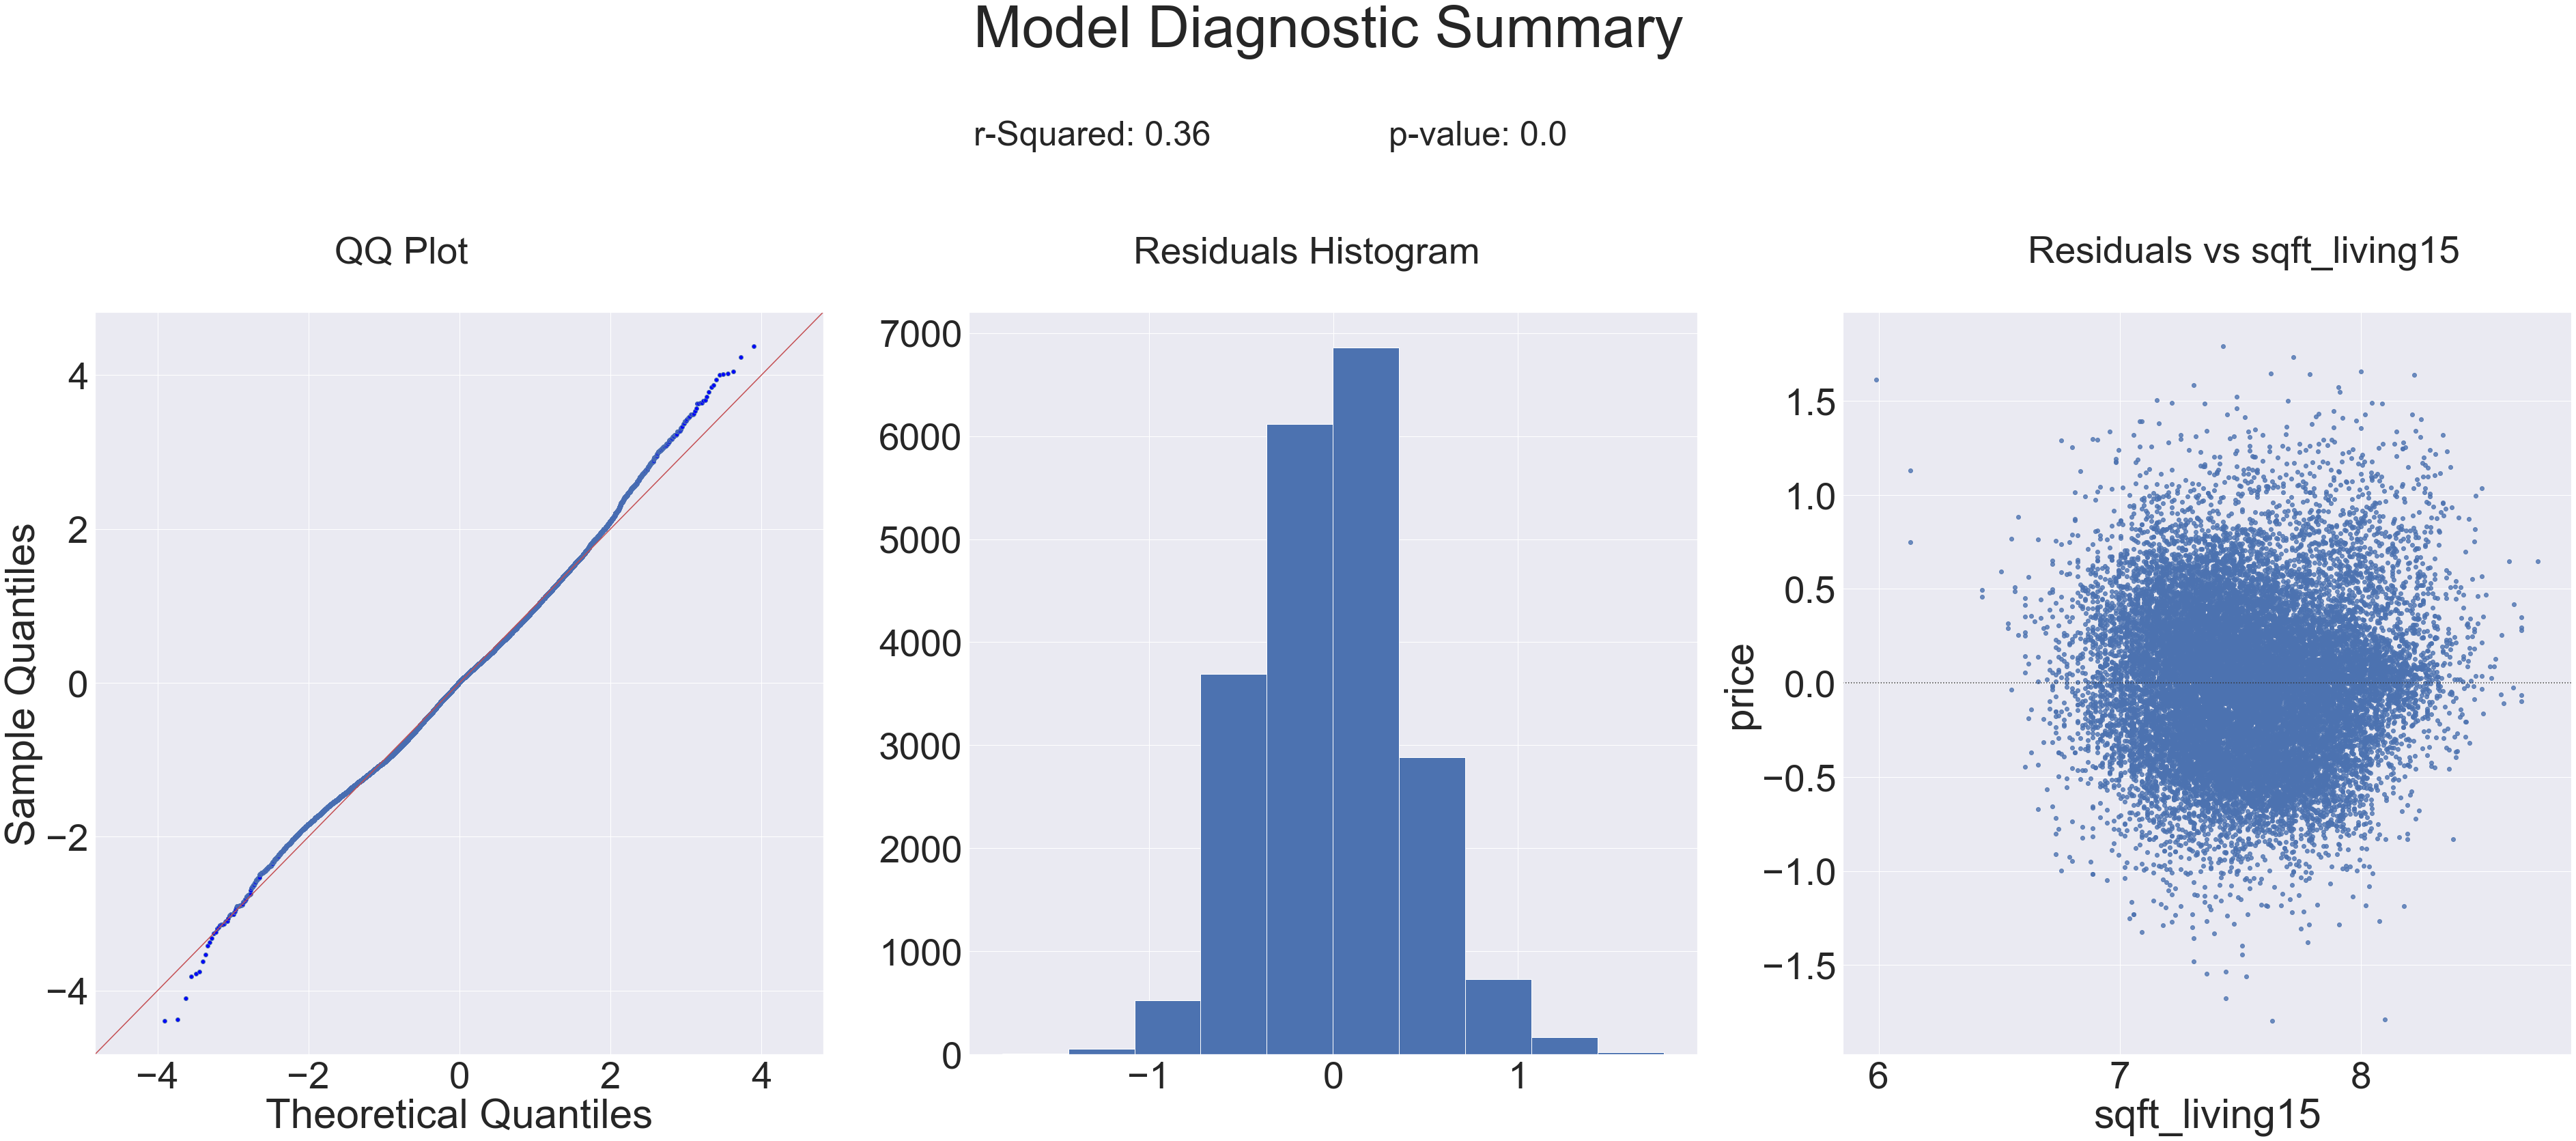

In [32]:
f = "price_log~sqft_living15_log"
sq_living_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(sq_living_model,sqft_living15_log, 'sqft_living15', price_log)

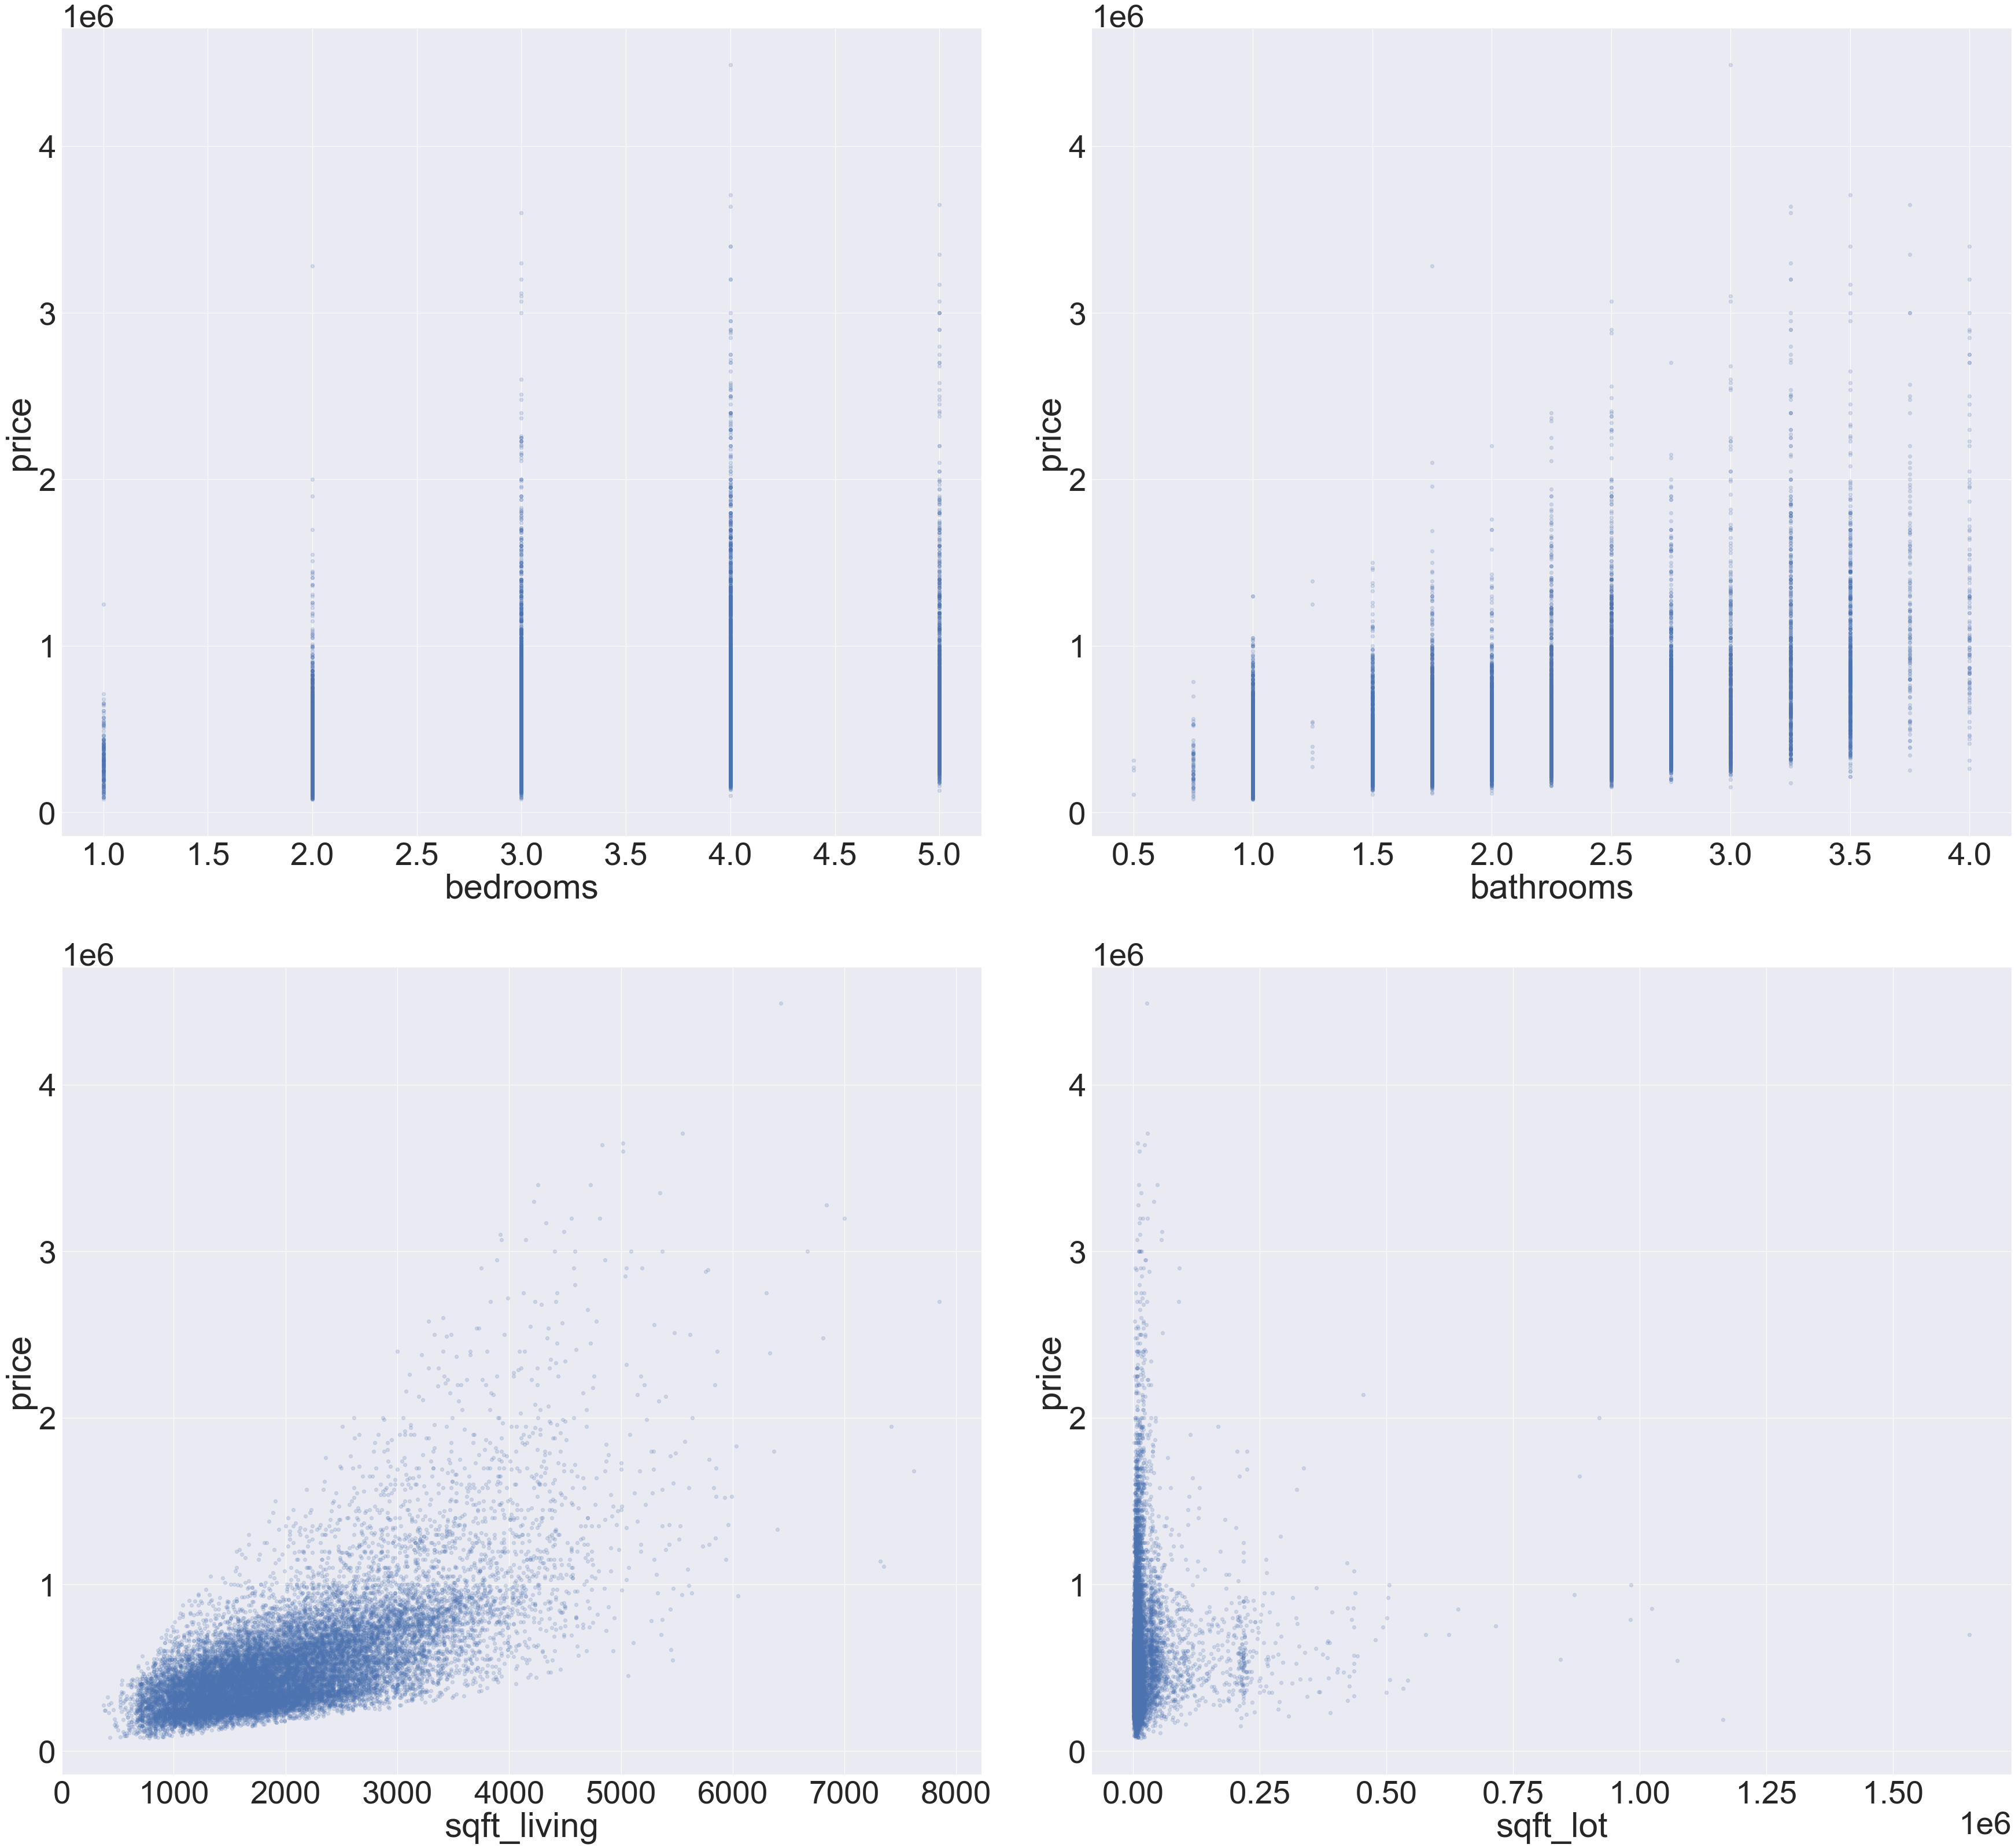

In [30]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(50, 46))
fig.set_tight_layout(True)

xcont = df_kc.select_dtypes(('int64', 'float64')).columns.drop([ 'yr_built', 'price', 'floors'])


for xcol, ax in zip(xcont, axes.flatten()):
    ax.scatter(df_kc[xcol], df_kc['price'], alpha=0.2)
    ax.set_xlabel(xcol)
    ax.set_ylabel("price")